## Data Wrangling

In [1]:
import pyodbc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#loading data from sql server into notebook
server = r'DESKTOP-NCKLFS5\MU3'
database = 'CustomerChurn_DWH'
trusted_connection = 'yes'
conn = pyodbc.connect(
    f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection={trusted_connection};'
)
query = 'SELECT * FROM churn_dataset'
df = pd.read_sql(query, conn)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Customer_Id,Gender,Age,Under_30,Senior,State,Contract_Type,Payment_Method,Unlimited_Data_Plan,Device_Protection_OnlineBackup,Intl_acive,Intl_Plan,Account_lenth_months,Avg_Monthly_GB_Download,Customer_Service_Calls,Extra_Data_Charges,Extra_Intl_Charges,Intl_Calls,Intl_Mins,Local_Calls,Local_Mins,Monthly_Charge,Total_Charges,Churn_Label
0,0000-XZWZ,Male,50,No,No,DC,Month-to-Month,Credit Card,Yes,No,Yes,no,1,7.0,0,0.0,4.000000,4,12.100000,2,4.000000,16.0,16.0,Yes
1,0001-NBTF,Male,23,Yes,No,LA,Month-to-Month,Direct Debit,Yes,No,No,no,67,14.0,2,0.0,0.000000,0,0.000000,201,534.299988,24.0,1623.0,No
2,0001-QFCV,Female,58,No,No,MT,Two Year,Direct Debit,No,No,No,no,74,14.0,1,57.0,0.000000,0,0.000000,181,592.900024,30.0,2190.0,No
3,0002-UBRG,Female,77,No,Yes,NY,Two Year,Direct Debit,Yes,No,No,no,15,5.0,0,0.0,0.000000,0,0.000000,34,91.800003,40.0,616.0,No
4,0003-PKVZ,Female,72,No,Yes,WV,Month-to-Month,Direct Debit,Yes,No,Yes,no,38,1.0,2,0.0,82.099998,114,410.399994,215,562.700012,64.0,2419.0,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Id                     6687 non-null   object 
 1   Gender                          6687 non-null   object 
 2   Age                             6687 non-null   int64  
 3   Under_30                        6687 non-null   object 
 4   Senior                          6687 non-null   object 
 5   State                           6687 non-null   object 
 6   Contract_Type                   6687 non-null   object 
 7   Payment_Method                  6687 non-null   object 
 8   Unlimited_Data_Plan             6687 non-null   object 
 9   Device_Protection_OnlineBackup  6687 non-null   object 
 10  Intl_acive                      6687 non-null   object 
 11  Intl_Plan                       6687 non-null   object 
 12  Account_lenth_months            66

In [5]:
df.isnull().sum()

Customer_Id                       0
Gender                            0
Age                               0
Under_30                          0
Senior                            0
State                             0
Contract_Type                     0
Payment_Method                    0
Unlimited_Data_Plan               0
Device_Protection_OnlineBackup    0
Intl_acive                        0
Intl_Plan                         0
Account_lenth_months              0
Avg_Monthly_GB_Download           0
Customer_Service_Calls            0
Extra_Data_Charges                0
Extra_Intl_Charges                0
Intl_Calls                        0
Intl_Mins                         0
Local_Calls                       0
Local_Mins                        0
Monthly_Charge                    0
Total_Charges                     0
Churn_Label                       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop('Customer_Id', axis=1, inplace=True)

In [8]:
for column in df.columns:
    if df[column].dtype != 'int64'and df[column].dtype != 'float64':
        print(f'{column}: {df[column].unique()}')
    
    

Gender: ['Male' 'Female' 'Prefer not to say']
Under_30: ['No' 'Yes']
Senior: ['No' 'Yes']
State: ['DC' 'LA' 'MT' 'NY' 'WV' 'NC' 'WI' 'CT' 'FL' 'MS' 'OR' 'OK' 'NE' 'VT'
 'SC' 'ID' 'TN' 'KY' 'ME' 'TX' 'MN' 'VA' 'WY' 'ND' 'MD' 'MI' 'IN' 'AK'
 'UT' 'AR' 'MO' 'DE' 'NJ' 'IA' 'PA' 'NM' 'RI' 'SD' 'NH' 'OH' 'WA' 'AZ'
 'CO' 'CA' 'GA' 'AL' 'MA' 'KS' 'HI' 'NV' 'IL']
Contract_Type: ['Month-to-Month' 'Two Year' 'One Year']
Payment_Method: ['Credit Card' 'Direct Debit' 'Paper Check']
Unlimited_Data_Plan: ['Yes' 'No']
Device_Protection_OnlineBackup: ['No']
Intl_acive: ['Yes' 'No']
Intl_Plan: ['no' 'yes']
Churn_Label: ['Yes' 'No']


In [9]:
df.drop('Device_Protection_OnlineBackup', axis=1, inplace=True)

<AxesSubplot:xlabel='Gender', ylabel='Churn_Label'>

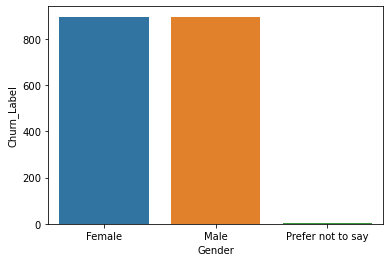

In [10]:
Gen_yes_count = df[df['Churn_Label']=='Yes'][['Gender','Churn_Label']].groupby(['Gender']).count()
sns.barplot(x=Gen_yes_count.index, y=Gen_yes_count['Churn_Label'])

In [11]:
df.drop('Gender', axis=1, inplace=True)

<AxesSubplot:xlabel='Under_30', ylabel='Churn_Label'>

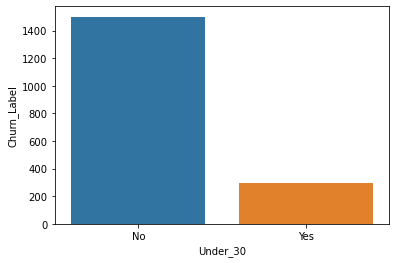

In [12]:
under30_yes_count = df[df['Churn_Label']=='Yes'][['Under_30','Churn_Label']].groupby(['Under_30']).count()
sns.barplot(x=under30_yes_count.index, y=under30_yes_count['Churn_Label'])

<AxesSubplot:xlabel='State', ylabel='Churn_Label'>

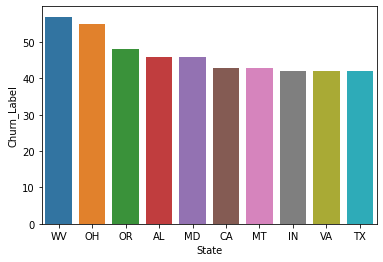

In [13]:
state_yes_count = df[df['Churn_Label']=='Yes'][['State','Churn_Label']].groupby(['State']).count().sort_values(by='Churn_Label', ascending=False).head(10)
sns.barplot(x=state_yes_count.index, y=state_yes_count['Churn_Label'])

In [14]:
df.drop('State', axis=1, inplace=True)

<AxesSubplot:xlabel='Contract_Type', ylabel='Count'>

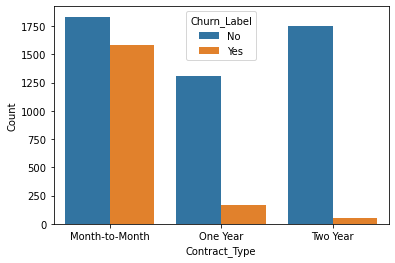

In [15]:
Contract_Type_count = df.groupby(['Contract_Type', 'Churn_Label']).size().reset_index(name='Count')
sns.barplot(data=Contract_Type_count, x='Contract_Type', y='Count', hue='Churn_Label')

<AxesSubplot:xlabel='Unlimited_Data_Plan', ylabel='Count'>

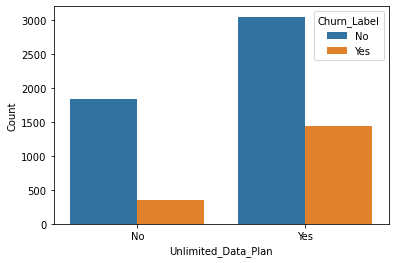

In [16]:
unlimdata_count = df.groupby(['Unlimited_Data_Plan', 'Churn_Label']).size().reset_index(name='Count')
sns.barplot(data=unlimdata_count, x='Unlimited_Data_Plan', y='Count', hue='Churn_Label')

<AxesSubplot:xlabel='Intl_acive', ylabel='Count'>

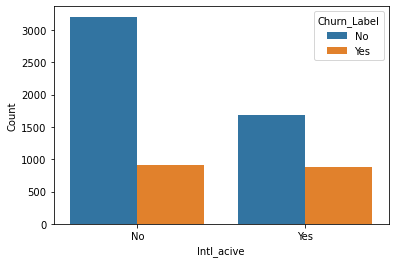

In [17]:
intactive_count = df.groupby(['Intl_acive', 'Churn_Label']).size().reset_index(name='Count')
sns.barplot(data=intactive_count, x='Intl_acive', y='Count', hue='Churn_Label')

<AxesSubplot:xlabel='Intl_Plan', ylabel='Count'>

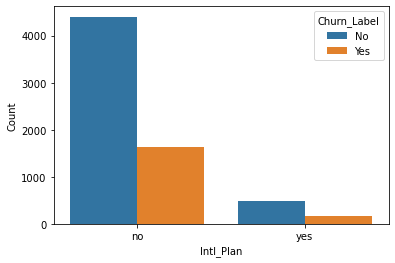

In [18]:
intplan_count = df.groupby(['Intl_Plan', 'Churn_Label']).size().reset_index(name='Count')
sns.barplot(data=intplan_count, x='Intl_Plan', y='Count', hue='Churn_Label')

In [19]:
df = df.replace({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Payment_Method', 'Contract_Type']:
    df[col] = le.fit_transform(df[col])

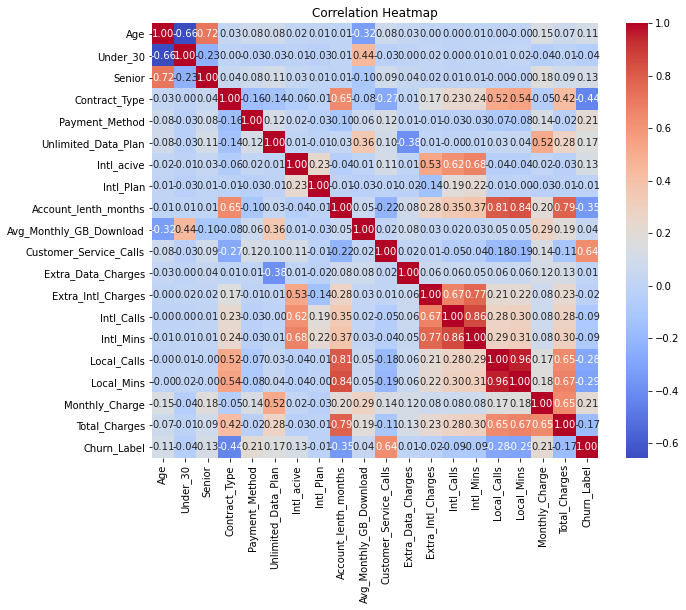

In [21]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [22]:
df.drop(['Under_30','Intl_Plan','Avg_Monthly_GB_Download','Extra_Data_Charges', 'Extra_Intl_Charges'], axis = 1, inplace=True)

In [23]:
df.head()

,Age,Senior,Contract_Type,Payment_Method,Unlimited_Data_Plan,Intl_acive,Account_lenth_months,Customer_Service_Calls,Intl_Calls,Intl_Mins,Local_Calls,Local_Mins,Monthly_Charge,Total_Charges,Churn_Label
0,50,0,0,0,1,1,1,0,4,12.100000,2,4.000000,16.0,16.0,1
1,23,0,0,1,1,0,67,2,0,0.000000,201,534.299988,24.0,1623.0,0
2,58,0,2,1,0,0,74,1,0,0.000000,181,592.900024,30.0,2190.0,0
3,77,1,2,1,1,0,15,0,0,0.000000,34,91.800003,40.0,616.0,0
4,72,1,0,1,1,1,38,2,114,410.399994,215,562.700012,64.0,2419.0,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df.drop('Churn_Label', axis=1)
y = df['Churn_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42, sampling_strategy = 1.0)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [27]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, n_jobs=-1)

xgb_model.fit(X_train_sm, y_train_sm)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
# Predictions
y_pred = xgb_model.predict(X_test)

# Scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.874439461883408
[[885 106]
 [ 62 285]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       991
           1       0.73      0.82      0.77       347

    accuracy                           0.87      1338
   macro avg       0.83      0.86      0.84      1338
weighted avg       0.88      0.87      0.88      1338



In [43]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
model_rf = RandomForestClassifier(n_estimators=110,
    random_state=42)

model_rf.fit(X_train_sm, y_train_sm)


RandomForestClassifier(n_estimators=110, random_state=42)

In [44]:
# Predictions
y_pred = model_rf.predict(X_test)

# Scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8819133034379671
[[889 102]
 [ 56 291]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       991
           1       0.74      0.84      0.79       347

    accuracy                           0.88      1338
   macro avg       0.84      0.87      0.85      1338
weighted avg       0.89      0.88      0.88      1338



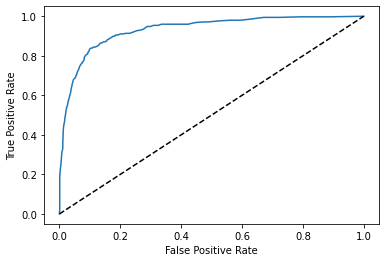

In [56]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate the probabilities
y_pred_prob = model_rf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [57]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9313897120191232
